## Categorical


In [ ]:
import os

import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import seaborn as sns
from rich import print

import plotly.express as px
import plotly.graph_objects as go

In [ ]:
data = pd.read_csv("../data/spotify_songs_train.csv")

Text(0, 0.5, 'Data type')

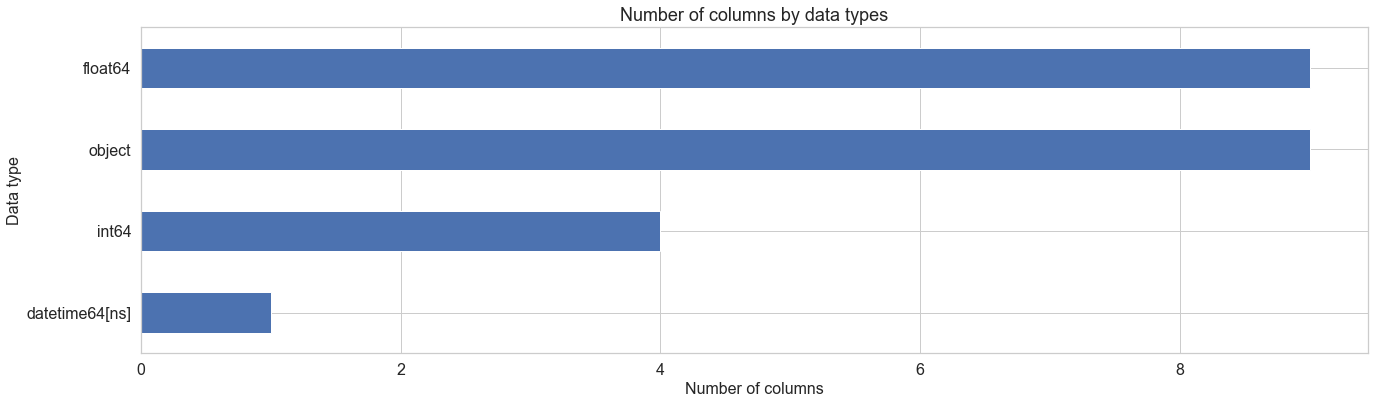

In [ ]:
# Number of each type of column
data.dtypes.value_counts().sort_values().plot(kind="barh", figsize=(22, 6), fontsize=16)

plt.title("Number of columns by data types", fontsize=18)
plt.xlabel("Number of columns", fontsize=16)
plt.ylabel("Data type", fontsize=16)

Count number of categories for each object data


In [ ]:
data.select_dtypes("object").apply(pd.Series.nunique, axis=0)


track_id             25831
track_name           21599
track_artist         10026
track_album_id       20782
track_album_name     18312
playlist_name          449
playlist_id            471
playlist_genre           6
playlist_subgenre       24
dtype: int64

## Genre & Sub-genre Distribution


<ipython-input-48-3c772ae70e45>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["playlist_genre"].fillna(value="NA", inplace=True)


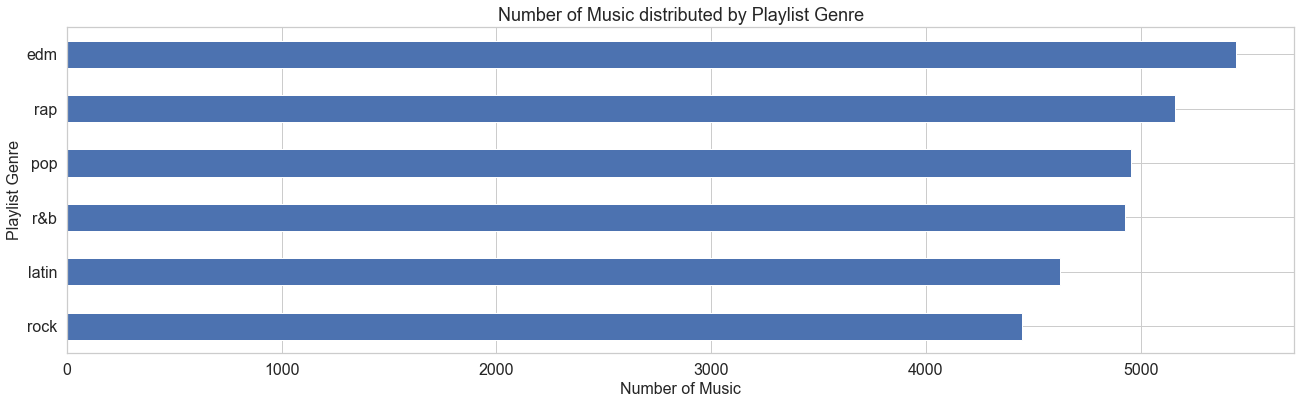

In [ ]:
data["playlist_genre"].fillna(value="NA", inplace=True)

data["playlist_genre"].value_counts().sort_values().plot(
    kind="barh", figsize=(22, 6), fontsize=16
)

plt.title("Number of Music distributed by Playlist Genre", fontsize=18)
plt.xlabel("Number of Music", fontsize=16)
plt.ylabel("Playlist Genre", fontsize=16)

plt.savefig("../plots/playlist_genre.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
fig = px.box(
    data,
    x="playlist_genre",
    y="track_popularity",
    title="Track Popularity Distribution Over Different Genres",
)
fig.show()

- 'pop' and 'latin' having higher median popularity compare to other gener
- 'edm' has the lowest median popularity although it has the highest number of tracks
- 'Rap' show a relative high median popularity and a narrower interquartile range (IQR), indicating consistent performance among its tracks
- Rock' have fewer tracks, but has relative high median popularity, indicate that the genre, while less represented, has tracks that perform exceptionally well in terms of popularity


<ipython-input-51-6b8c7e8956b5>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





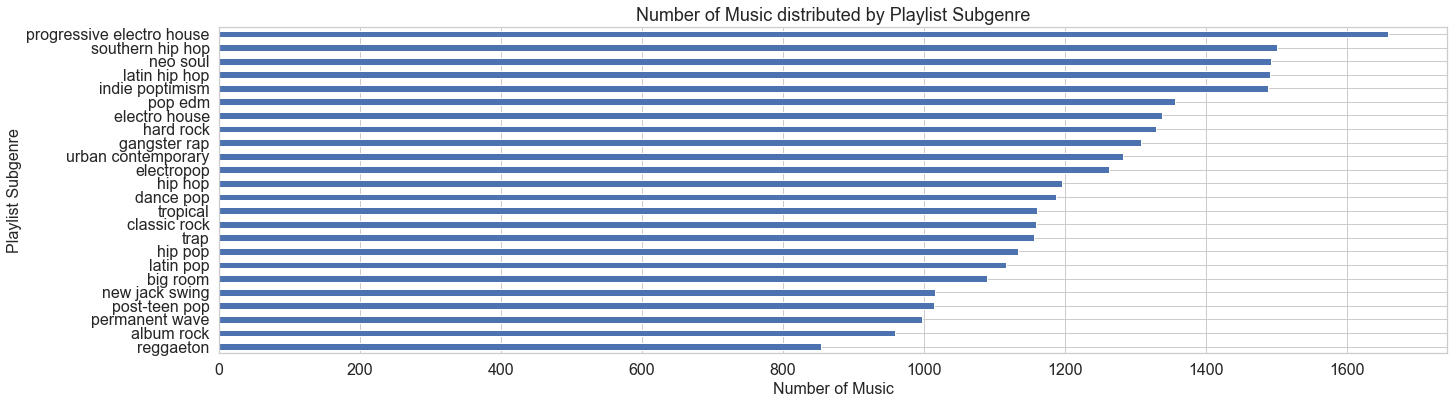

In [ ]:
data["playlist_subgenre"].fillna(value="NA", inplace=True)

data["playlist_subgenre"].value_counts().sort_values().plot(
    kind="barh", figsize=(22, 6), fontsize=16
)

plt.title("Number of Music distributed by Playlist Subgenre", fontsize=18)
plt.xlabel("Number of Music", fontsize=16)
plt.ylabel("Playlist Subgenre", fontsize=16)
plt.savefig("../plots/playlist_subgenre.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
fig = px.box(
    data,
    x="playlist_subgenre",
    y="track_popularity",
    title="Track Popularity Distribution Over Different Genres",
)
fig.show()

- 'Progressive electro house' has the most tracks (1659), while 'reggaeton' has the fewest (854)
- 'Post-teen pop' has the highest mean popularity
- 'Progressive electro house' has the lowest mean popularity at 26.76, despite having the highest number of tracks
- 'Hip pop' and 'urban contemporary' show high mean popularity scores (53.96 and 50.73, respectively) and a high degree of variability -> these subgenres have a wide range of track popularity
- 'New jack swing' has a lower mean popularity (27.73) and a lower maximum popularity score (80), indicating that tracks in this subgenre are less popular on average
- 'Neo soul' and 'southern hip hop' have a large number of tracks but only moderate mean popularity scores (32.67 and 36.56, respectively). This could imply that while there is significant content, it does not have the same level of mainstream popularity as some other subgenres.
- 'reggaeton' has fewer tracks but a high mean popularity score (53.16), suggesting that while the subgenre may have fewer entries, its tracks tend to be very popular.


In [ ]:
features = [
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms",
]


def make_violin_plot(data, feature, Playlist_Genre_or_Subgenre):
    fig = go.Figure()

    unique_genres = data[Playlist_Genre_or_Subgenre].unique()
    for genre in unique_genres:
        fig.add_trace(
            go.Violin(
                x=data[Playlist_Genre_or_Subgenre][
                    data[Playlist_Genre_or_Subgenre] == genre
                ],
                y=data[feature][data[Playlist_Genre_or_Subgenre] == genre],
                name=genre,
                box_visible=True,
                meanline_visible=True,
            )
        )

    fig.update_traces(points="all")
    fig.update_layout(
        title=f"Violin Plot of {feature} by {Playlist_Genre_or_Subgenre}",
        xaxis_title=Playlist_Genre_or_Subgenre,
        yaxis_title=feature.capitalize(),
    )
    fig.show()

In [ ]:
make_violin_plot(data, features[0], "playlist_genre")

In [ ]:
make_violin_plot(data, features[0], "playlist_subgenre")

Realized that there are feat or with in from the track_name and track_album_name


In [ ]:
print(
    "count of track name contains feat  - ",
    data["track_name"].str.contains("feat").sum(),
)
print(
    "count of track name contains with  - ",
    data["track_name"].str.contains("\(with").sum(),
)
print(
    "count of track_album__name contains feat  - ",
    data["track_album_name"].str.contains("feat").sum(),
)
print(
    "count of track_album__name contains with  - ",
    data["track_album_name"].str.contains("\(with").sum(),
)

count of track name contains feat  -  2482

count of track name contains with  -  292

count of track_album__name contains feat  -  1232

count of track_album__name contains with  -  217

In [ ]:
# Create new feature for track that has feat artist
data["feat"] = data["track_name"].str.contains("feat").fillna(False).astype(int)

# Create new feature for track that has with
data["with"] = data["track_name"].str.contains("\(with").fillna(False).astype(int)

<ipython-input-57-16c572eaf745>:2: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-57-16c572eaf745>:5: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Potential Variable - how many feat or with artist?
